Mental Health Data Analysis Amongst Employees

By Yoihen Elangbam

Importing the Libraries and Ignoring Warnings (unnecessary)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [42]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Display the first ten rows
df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


In [43]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 5000


Show Metadata

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Show Missing Null Values

In [45]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Mental_Health_Condition,1196
Physical_Activity,1629


Number Summary

In [46]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


Age Distribution

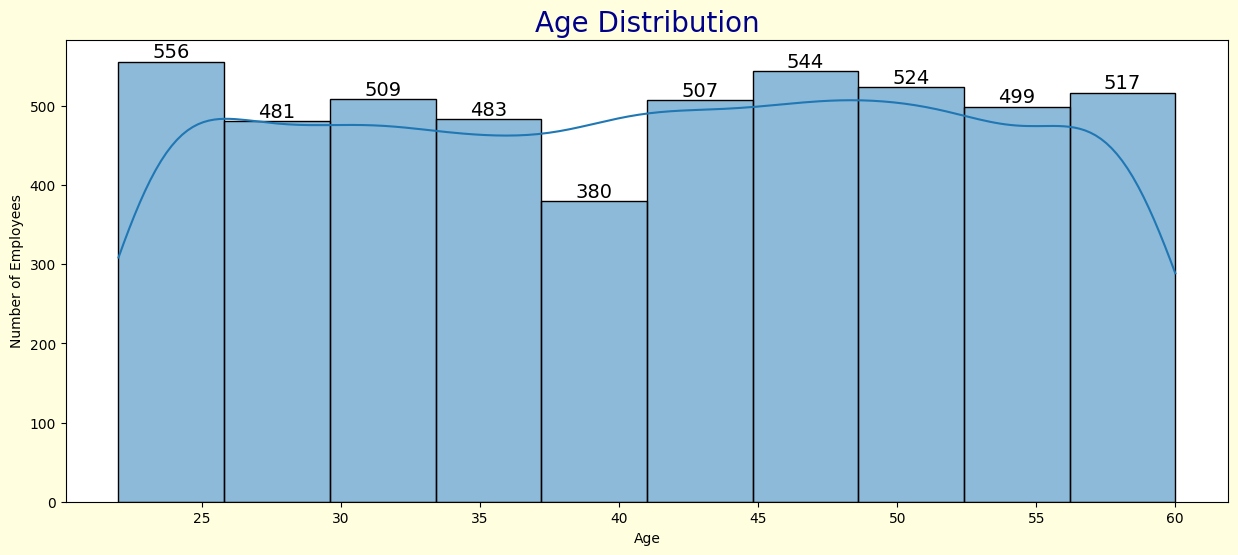

In [47]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(df['Age'], bins=10, kde=True)

plt.gcf().set_facecolor('lightyellow')

plt.title('Age Distribution', fontsize = 20,color='darkblue')
plt.xlabel('Age')
plt.ylabel('Number of Employees')

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(
                 patch.get_x() + patch.get_width() / 2,
                 height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=14
                 )
plt.show()

Gender Distribution

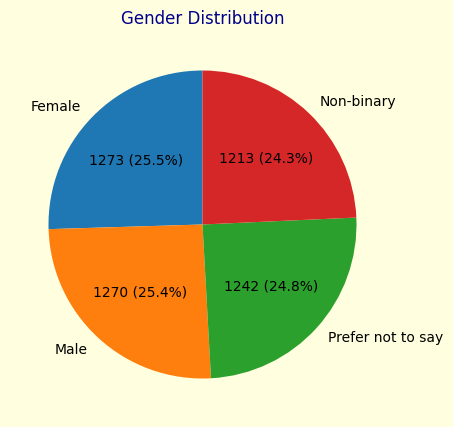

In [48]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
      gender_counts,
        labels=gender_counts.index,
        autopct=lambda p: f'{int(p * sum(gender_counts) / 100)} ({p:.1f}%)',
        startangle=90
        )
plt.gcf().set_facecolor('lightyellow')
plt.title('Gender Distribution',color='darkblue')
plt.show()

Region Distribution

In [49]:
df["Region"].value_counts()

,count
Region,
Oceania,867
Africa,860
Europe,840
Asia,829
South America,827
North America,777


Correlation Matrix

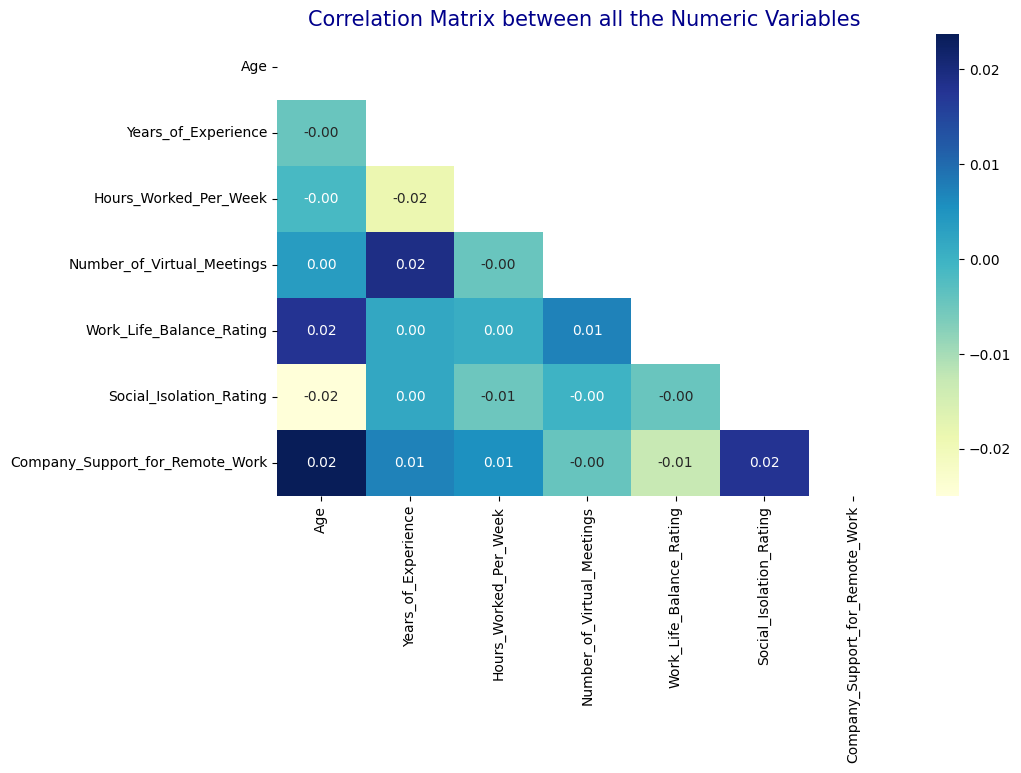

In [50]:
df1 = df.select_dtypes(include=[np.number])
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 6))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", mask=matrix)
plt.title('Correlation Matrix between all the Numeric Variables ',color='darkblue',size=15)
plt.show()

Job Distribution

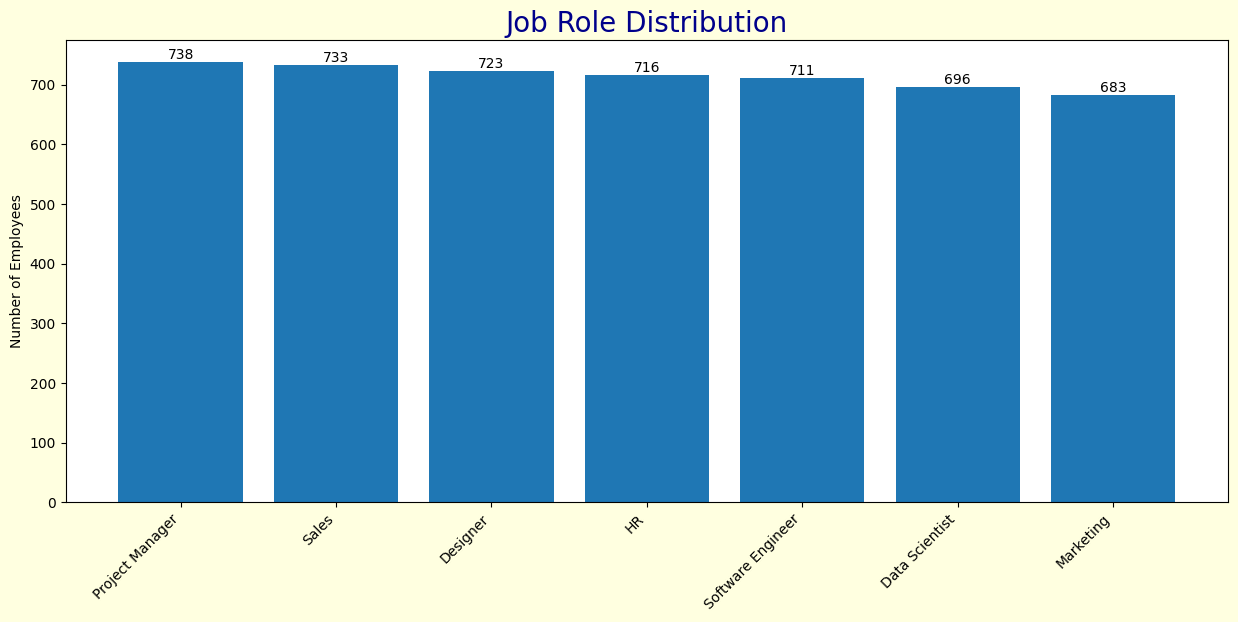

In [51]:
job_role_counts = df['Job_Role'].value_counts()

plt.figure(figsize=(15, 6))
bars = plt.bar(job_role_counts.index, job_role_counts.values)

plt.gcf().set_facecolor('lightyellow')

plt.title('Job Role Distribution', fontsize=20, color='darkblue')
plt.ylabel('Number of Employees')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval,
             int(yval),
             ha='center', va='bottom', fontsize=10)

plt.show()

Industry Distribution

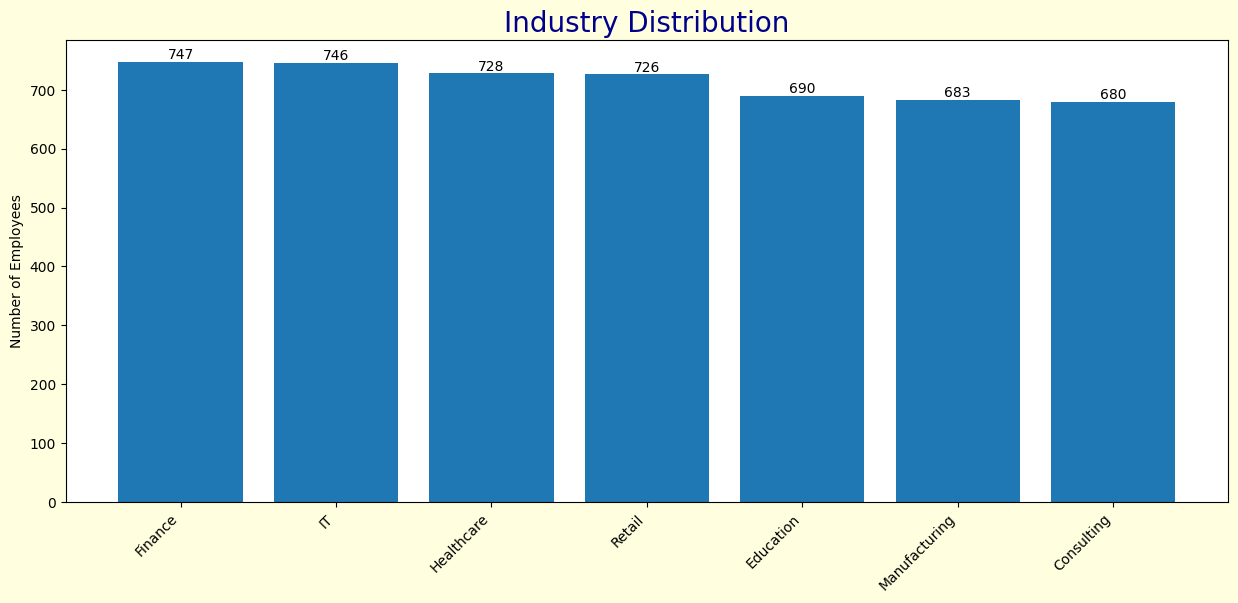

In [52]:
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(15, 6))
bars = plt.bar(industry_counts.index, industry_counts.values)

plt.gcf().set_facecolor('lightyellow')

plt.title('Industry Distribution', fontsize=20, color='darkblue')
plt.ylabel('Number of Employees')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval,
             int(yval),
             ha='center', va='bottom', fontsize=10)

plt.show()

Average Hour Worked by Employees in Different Industry Professionals

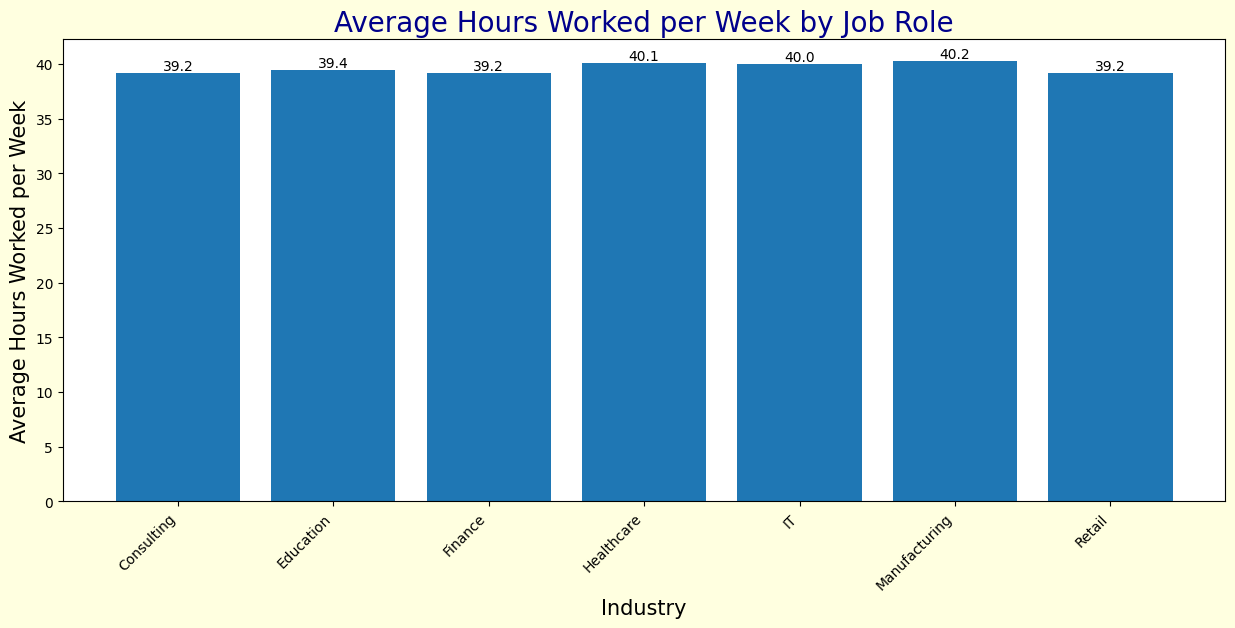

In [53]:
average_hours_by_job = df.groupby('Industry')['Hours_Worked_Per_Week'].mean()

plt.figure(figsize=(15, 6))
bars = plt.bar(average_hours_by_job.index, average_hours_by_job.values)

plt.gcf().set_facecolor('lightyellow')

plt.title('Average Hours Worked per Week by Job Role', fontsize=20, color='darkblue')
plt.xlabel('Industry', fontsize=15)
plt.ylabel('Average Hours Worked per Week', fontsize=15)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval,
             f'{yval:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Average Hour Worked by Employees in Different Job Roles

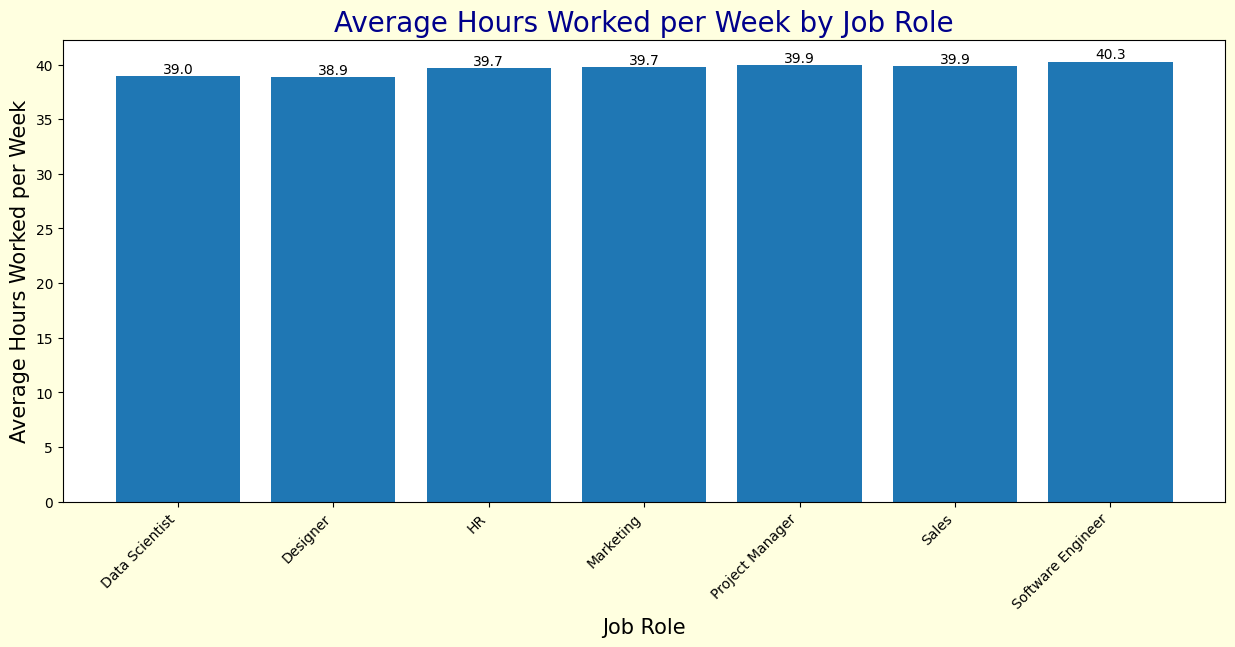

In [54]:
average_hours_by_job = df.groupby('Job_Role')['Hours_Worked_Per_Week'].mean()

plt.figure(figsize=(15, 6))
bars = plt.bar(average_hours_by_job.index, average_hours_by_job.values)

plt.gcf().set_facecolor('lightyellow')

plt.title('Average Hours Worked per Week by Job Role', fontsize=20, color='darkblue')
plt.xlabel('Job Role', fontsize=15)
plt.ylabel('Average Hours Worked per Week', fontsize=15)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval,
             f'{yval:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Average Work Life Balance Rating by Different Job Roles

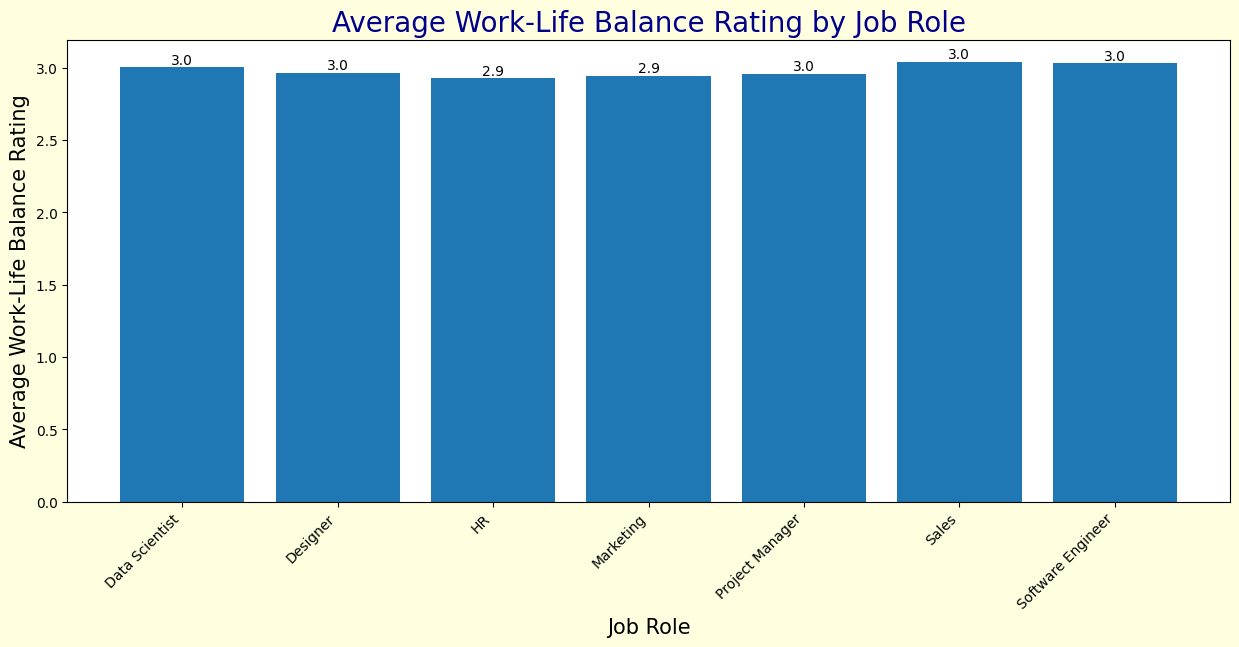

In [55]:
average_wlb_by_job = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()

# Create the bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(average_wlb_by_job.index, average_wlb_by_job.values)

# Set the figure background color
plt.gcf().set_facecolor('lightyellow')

# Set the title and axis labels with custom font sizes and colors
plt.title('Average Work-Life Balance Rating by Job Role', fontsize=20, color='darkblue')
plt.xlabel('Job Role', fontsize=15)
plt.ylabel('Average Work-Life Balance Rating', fontsize=15)

plt.xticks(rotation=45, ha='right')

# Add the average work-life balance rating on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2,  # Center of the bar
             yval,  # Place text at the top of the bar
             f'{yval:.1f}',  # Show the average rating formatted to one decimal place
             ha='center', va='bottom', fontsize=10, color='black')  # Center horizontally

plt.show()

Average Social Isolation Rating by Different Job Roles

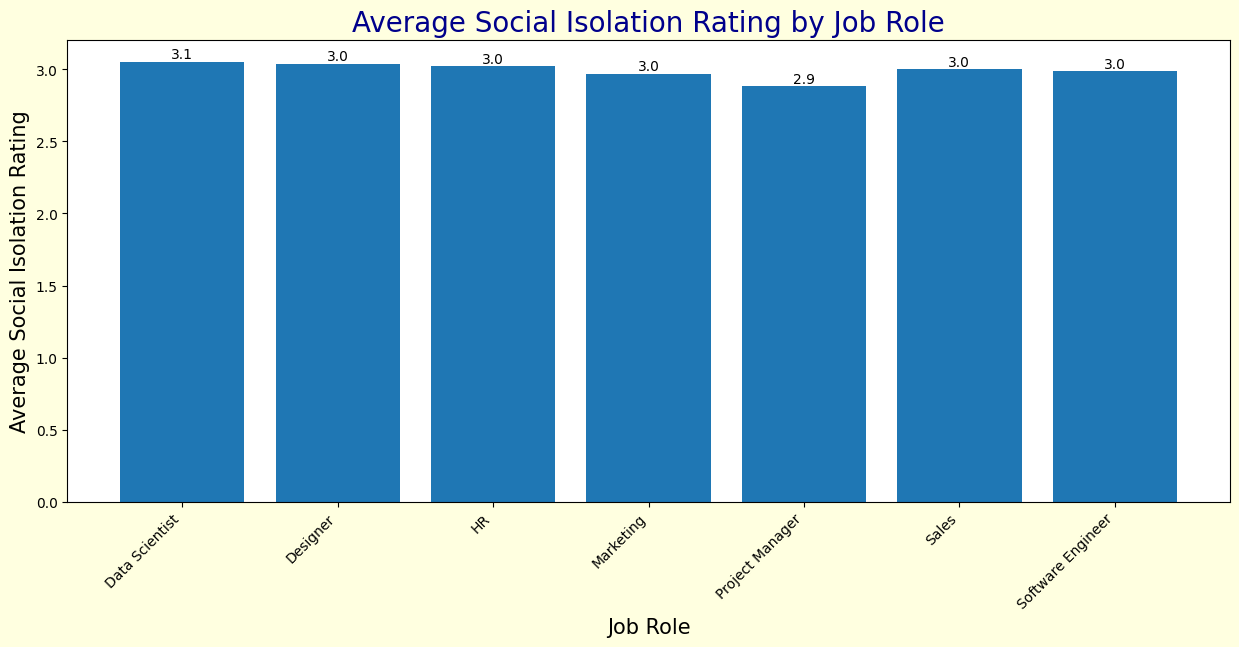

In [56]:
import matplotlib.pyplot as plt

# Sample data (ensure df is defined)
# df = pd.DataFrame({'Job_Role': ['Engineer', 'Manager', 'Analyst', 'Engineer', 'Manager'], 'Social_Isolation_Rating': [3.2, 4.1, 3.8, 2.9, 4.0]})  # Example DataFrame

# Calculate the average social isolation rating by job role
average_social_isolation_by_job = df.groupby('Job_Role')['Social_Isolation_Rating'].mean()

# Create the bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(average_social_isolation_by_job.index, average_social_isolation_by_job.values)

# Set the figure background color
plt.gcf().set_facecolor('lightyellow')

# Set the title and axis labels with custom font sizes and colors
plt.title('Average Social Isolation Rating by Job Role', fontsize=20, color='darkblue')
plt.xlabel('Job Role', fontsize=15)
plt.ylabel('Average Social Isolation Rating', fontsize=15)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add the average social isolation rating on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2,  # Center of the bar
             yval,  # Place text at the top of the bar
             f'{yval:.1f}',  # Show the average rating formatted to one decimal place
             ha='center', va='bottom', fontsize=10, color='black')  # Center horizontally

# Show the plot
plt.show()

Plotting Multiple Bar Graph for Average WLB and Social Isolation Rating grouped by Work Location Basis

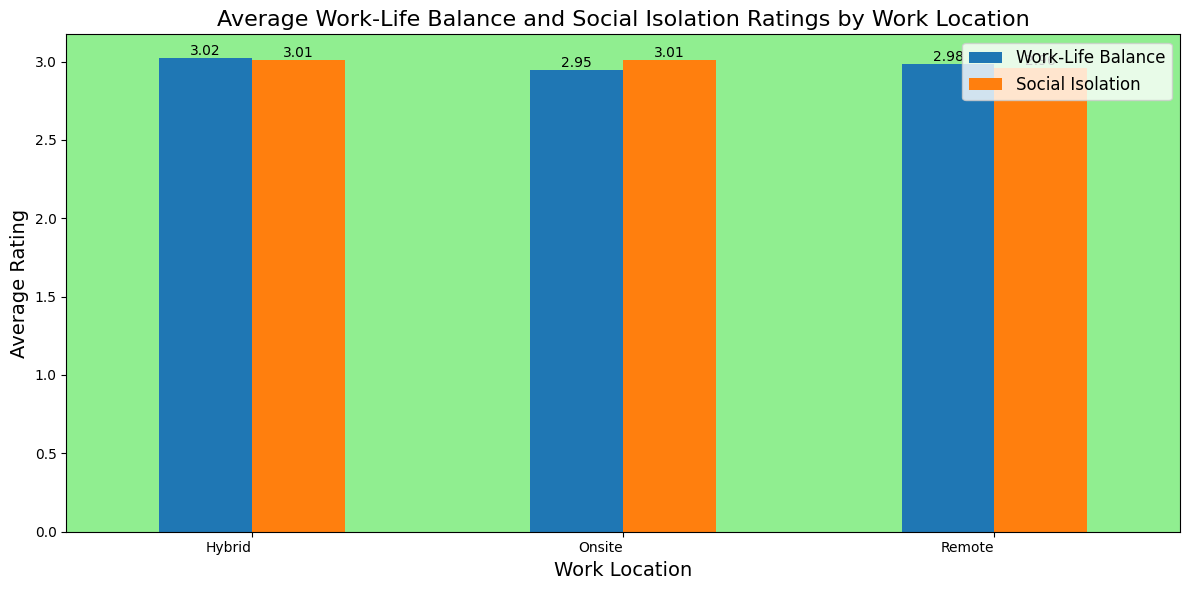

In [74]:
average_ratings_by_location = df.groupby('Work_Location')[['Work_Life_Balance_Rating', 'Social_Isolation_Rating']].mean()

# Create a multiple bar chart
ax = average_ratings_by_location.plot(kind='bar', figsize=(12, 6))
plt.title('Average Work-Life Balance and Social Isolation Ratings by Work Location', fontsize=16)
plt.xlabel('Work Location', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.legend(['Work-Life Balance', 'Social Isolation'], fontsize=12)
plt.xticks(rotation=0, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.gca().set_facecolor('lightgreen')
plt.tight_layout()
plt.show()

FInding Average Work Life Balance Rating in Employee Age Groups

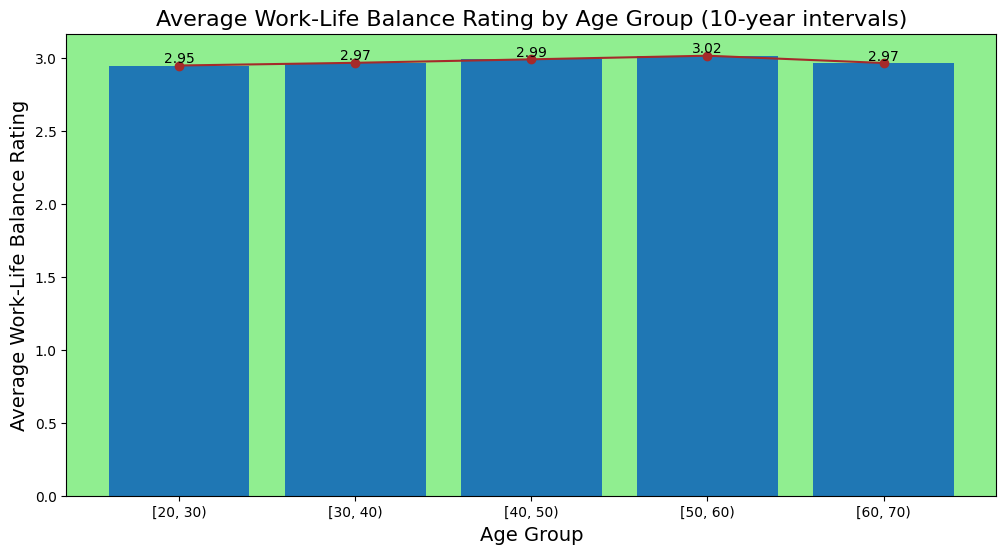

In [77]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 120, 10), right=False)
average_wlb_by_age_group = df.groupby('Age_Group')['Work_Life_Balance_Rating'].mean()
plt.figure(figsize=(12, 6))
bars = plt.bar(average_wlb_by_age_group.index.astype(str), average_wlb_by_age_group.values)

plt.gca().set_facecolor('lightgreen')

# Set the title and axis labels
plt.title('Average Work-Life Balance Rating by Age Group (10-year intervals)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Work-Life Balance Rating', fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.plot(average_wlb_by_age_group.index.astype(str), average_wlb_by_age_group.values, marker='o', color='brown')
plt.show()